# Image Preprocessor 1 – Image Transformation.

This notebook is an introduction to some skills of image preprocess, more precisely, image transformation. Here, we cover

- Translation
- Rotation
- Resizing
- Flipping
- Cropping

## Importing Libraries

In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

## Loading image from disk


In [2]:
img = cv2.imread("images/gil.jpg")

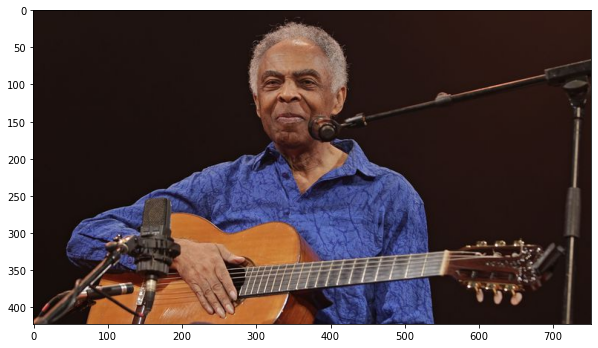

In [3]:
plt.figure(figsize=(10, 15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### Image Translation

Translation shifts the images along the axis x and y, moving up, down or
both.

**Translation**

To translate any image, we must do two essentials things. First, define a translation Matrix. Second, apply the **cv2.warpAffine** function.

The translation matrix must be a float point. We have two list (rows). The first list contains the range [1, 0, tx], where tx is the number of pixels to be shifted. Negative values of tx shift to left and, positives values shift to right. The second list is [ 0, 1, ty]. Negative values of ty shift up, positives values of ty shift down.

For better understanding about the warpAffine, [see](https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html).

In [4]:
# Shift down and right (positive tx, positive ty)
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted_rd = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
#shift up and left
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted_lu = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

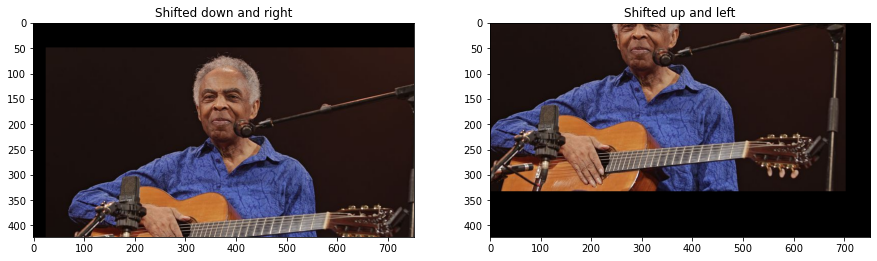

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Shifted down and right")
plt.imshow(cv2.cvtColor(shifted_rd, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("Shifted up and left")
plt.imshow(cv2.cvtColor(shifted_lu, cv2.COLOR_BGR2RGB))
plt.show()

**Defining a function to shift**

In [6]:
def translate(image, x, y):
    M = np.float32([1, 0, x], [0, 1 ,y])
    shifted = cv2.warpAffine(image, M, (image.shape[1], img.shape[0]))
    return shifted

**Using the above function**


In [7]:
shifted = imutils.translate(img, 0, 100)

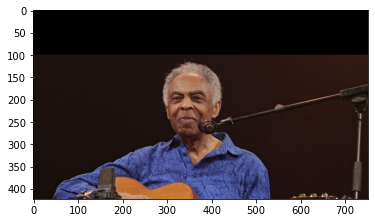

In [8]:
plt.imshow(cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB))

### Image Rotation

This method rotates any image by an angle $\theta$.

First of all, we must define the center point of the width and height. Second, we consider the function **cv2.getRatationMatrix2D
(center, degree, scale)**. Finally, we apply the function **cv2.warpAffine**.


In [9]:
(h, w) = img.shape[:2] # grabbing height and width
center = (w // 2, h // 2) # center point
M = cv2.getRotationMatrix2D(center, 45, 1.0) # rotating the image in 45 degree
rotated_45 = cv2.warpAffine(img, M, (w, h)) # applying the rotation to the image

M = cv2.getRotationMatrix2D(center, -90, 1.0) # rotating the image in -90 degree
rotated_m90 = cv2.warpAffine(img, M, (w, h)) # applying the rotation to the image

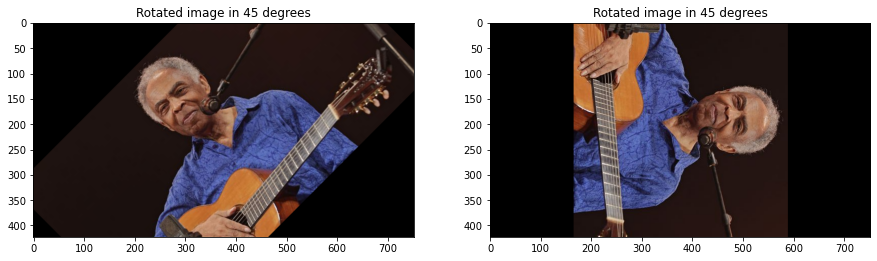

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Rotated image in 45 degrees")
plt.imshow(cv2.cvtColor(rotated_45, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("Rotated image in 45 degrees")
plt.imshow(cv2.cvtColor(rotated_m90, cv2.COLOR_BGR2RGB))
plt.show()

**Defining a function**

In [11]:
def rotate(image, angle, center = None, scale = 1.0):
    """Args:
            image: image to be rotated
            angle: angle to rotate the image
            ceter: center parameter is the point which we wish to rotate our image around. By default None
            scale: to handle if the size of the image should be changed during the rotation
    """
    (h, w) = image.shape[:2]
    if center is None:
        center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, 45, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

**using the above function**

In [12]:
rotated = imutils.rotate(img, 180) 

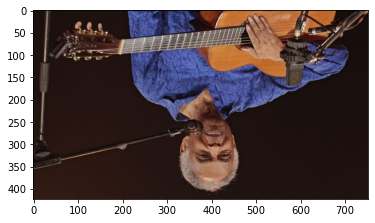

In [13]:
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))

### Image resize

Resize is a technique to change the size of an image. To proceed with the resize, we consider the function **cv2.resize**. The aspect ratio is important to be considered, otherwise, the resized image can be distorced. To have more details about this function, [see](https://docs.opencv.org/4.5.2/da/d6e/tutorial_py_geometric_transformations.html).

The arguments to the **cv2.resize(src,dsize,fx,fy, interpolation)**. Src is the image, dsize is the desired dimension, fx and fy are the start point of each dimension. Interpolation is the interpolation method will be considered.

**Aspect ratio** 

The aspect ratio can be considered for the width or height. For example, if you want to preserve the width, so we devise the desired width by the actual width. Let's see in the below example.


In [14]:
# resizing conserving the width aspect ratio
r = 150.0 / img.shape[1] # defining the ratio for the width
dim = (150, int(img.shape[0] * r)) # define the new dimension
resized_w = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) # resizing

# resizing conserving the height aspect ratio
r = 50.0 / img.shape[0] # defining the ratio for the width
dim = (int(img.shape[1] * r), 50) # define the new dimension
resized_h = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) # resizing

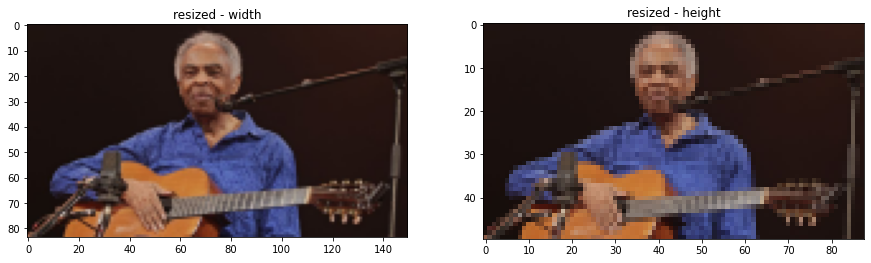

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("resized - width")
plt.imshow(cv2.cvtColor(resized_w, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("resized - height")
plt.imshow(cv2.cvtColor(resized_h, cv2.COLOR_BGR2RGB))
plt.show()

**Using a direct method with imutils library**

In [16]:
# resize conserving the width
resized_w = imutils.resize(img, width=100) 
# resize conserving the height
resized_h = imutils.resize(img, height=50)

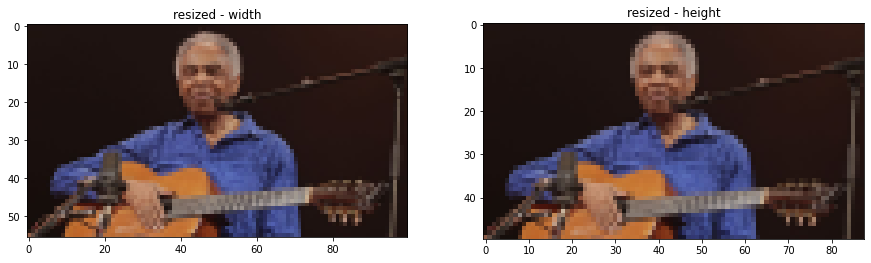

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("resized - width")
plt.imshow(cv2.cvtColor(resized_w, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("resized - height")
plt.imshow(cv2.cvtColor(resized_h, cv2.COLOR_BGR2RGB))
plt.show()

**defining a function**

In [18]:
def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    """Args:
            image: image to be resized
            width: image width. None by default
            height: image height. None by default
            inter: interpolation method. cv2.INTER_AREA by default
    """
    dim = None # setting the dimension as None
    (h, w) = image.shape[:2] # grabbing the width and height
    # checking the width and height
    if width is None and height is None:
        return image # there is no resize
    if width is None:# resizing conserving the height aspect ratio
        r = height / float(h)
        dim = (int(w * r), height)
    else: # resizing conserving the width aspect ratio
        r = width / float(w)
        dim = (width, int(h * r))
    # resizing the image
    resized = cv2.resize(image, dim, interpolation = inter)
    # returning the resized image
    return resized

In [19]:
resized_h = resize(img, width = 100)
resized_w = resize(img, height = 50)

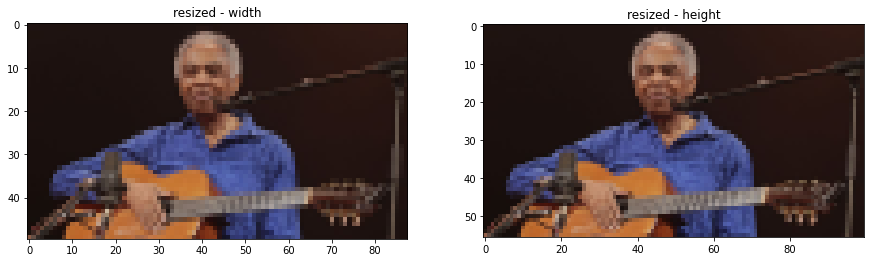

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("resized - width")
plt.imshow(cv2.cvtColor(resized_w, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("resized - height")
plt.imshow(cv2.cvtColor(resized_h, cv2.COLOR_BGR2RGB))
plt.show()

### Image flip

To flip an image around either the x or y axis, or even both, we consider the **cv2.flip** function.

For the flip function the arguments are: Src is the image source, dst output array of the same size and type as src. FlipCode is a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.

In [21]:
# Flipping horizontally
flipped_h = cv2.flip(img, 1)
# Flipping vertically
flipped_v = cv2.flip(img, 0)
# Flipping horizontally and vertically
flipped_hv = cv2.flip(img, -1)

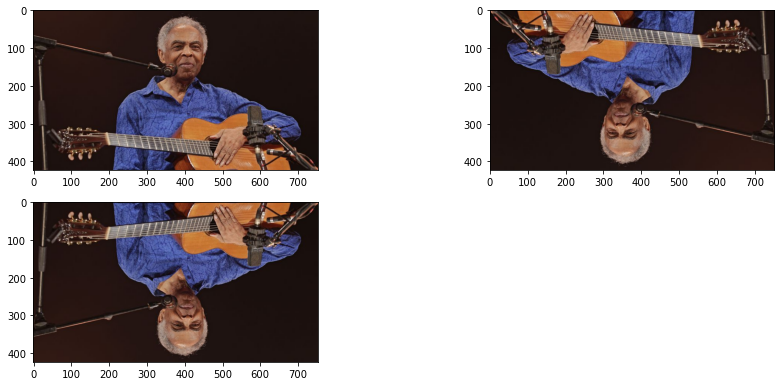

In [22]:
plt.figure(figsize=(15, 10))
plt.subplot(3,2,1)
plt.imshow(cv2.cvtColor(flipped_h, cv2.COLOR_BGR2RGB))
plt.subplot(3,2,2)
plt.imshow(cv2.cvtColor(flipped_v, cv2.COLOR_BGR2RGB))
plt.subplot(3,2,3)
plt.imshow(cv2.cvtColor(flipped_hv, cv2.COLOR_BGR2RGB))
plt.show()

**Defining a function**


In [23]:
def flip(image, fl=int):
    """Args:
            image: image to be flipped]
            fl: varible to define the flip orientation. 1 to horizintally, 0 to vertically and, -1 to the both
    """
    if fl == 1:
        flipped = cv2.flip(image, fl)
    if fl == 0:
        flipped = cv2.flip(image, fl)
    if fl == -1:
        flipped = cv2.flip(image, fl)
    return flipped
        

In [24]:
flipped = flip(img, -1)

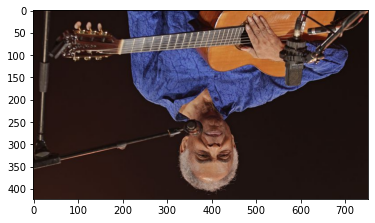

In [25]:
plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))

### Image crop

Crop an image allows us to select a desired region of any image. This is an important skill when you want to analyze some Region of Interest (ROI). Image crop demands one single action, define the the region with numpy slice. We must set the start and end point, for the coordinates $x$ and $y$.

In [26]:
# Slicing the ROI
# y-start 14, y-end 186, x-start 289. x-end428
cropped = img[14:186, 289:428]

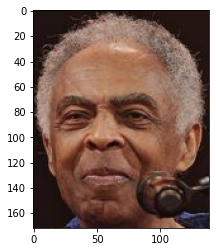

In [27]:
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

**Defining a function**

In [28]:
def crop(image, x_start, x_end, y_start, y_end):
    """Args:
            image: image to be cropped
            x_start: start point in the axis x
            x_end: end point in the axis x
            y_start: start point in the axis y
            y_end: end point in the axis y
    """
    cropped = image[y_start:y_end, x_start:x_end]
    return cropped

In [29]:
cropped = crop(img,289, 428, 14, 186)

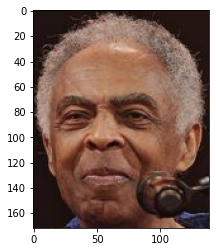

In [30]:
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))